# Sentiment

Visualize sentiment analysis

In [3]:
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
DATADIRECTORYALL = "../data/sentiment/"
DATADIRECTORYRIVM = "../data/rivm-sentiment/"
NEUTRAL = "NEUTRAL"
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
SENTIMENT = "sentiment"
COUNT = "count"
DATA = "data"
LABEL = "label"

Read hourly sentiment analysis

In [9]:
def getSentimentPerHour(dataDirectory):
    fileList = os.listdir(dataDirectory)
    sentimentPerHour = {}
    for inFileName in fileList:
        if re.search(r"2*z",inFileName):
            try: df = pd.read_csv(dataDirectory+inFileName,compression="gzip",header=None)
            except: continue
            counts = df[1].value_counts()
            if not POSITIVE in counts: counts[POSITIVE] = 0
            if not NEGATIVE in counts: counts[NEGATIVE] = 0
            if not NEUTRAL in counts: counts[NEUTRAL] = 0
            if counts[POSITIVE]+counts[NEGATIVE]+counts[NEUTRAL] == 0: sentiment = 0
            else: sentiment = (counts[POSITIVE]-counts[NEGATIVE])/(counts[POSITIVE]+counts[NEGATIVE]+counts[NEUTRAL])
            hour = inFileName[0:11]
            sentimentPerHour[hour] = { SENTIMENT:sentiment, COUNT:len(df) }
    sentimentPerHour = {key:sentimentPerHour[key] for key in sorted(sentimentPerHour.keys())}
    return(sentimentPerHour)

Convert hourly analysis to day scores

In [10]:
def makeSentimentPerDay(sentimentPerHour):
    sentimentPerDay = {}
    for hour in sentimentPerHour:
        day = re.sub("..$","12",hour)
        if not day in sentimentPerDay: sentimentPerDay[day] = {SENTIMENT:0,COUNT:0}
        sentimentPerDay[day][SENTIMENT] += sentimentPerHour[hour][SENTIMENT]*sentimentPerHour[hour][COUNT]
        sentimentPerDay[day][COUNT] += sentimentPerHour[hour][COUNT]
    for day in sentimentPerDay:
        sentimentPerDay[day][SENTIMENT] /= sentimentPerDay[day][COUNT]
    return(sentimentPerDay)

Visualize

In [32]:
DATEFORMATHOUR = "%Y%m%d-%H"
DATEFORMATDAY = "%Y%m%d"

def visualizeSentiment(dataSources):
    fig,ax = plt.subplots(figsize=(12,4))
    for i in range(0,len(dataSources)):
        data = dataSources[i][DATA]
        label = dataSources[i][LABEL]
        ax.plot_date([datetime.datetime.strptime(key,DATEFORMATHOUR) for key in data],\
                     [data[key][SENTIMENT] for key in data],xdate=True,fmt="-",label=label)
    plt.title("Sentiment scores of Dutch tweets over time")
    plt.legend()
    plt.show()

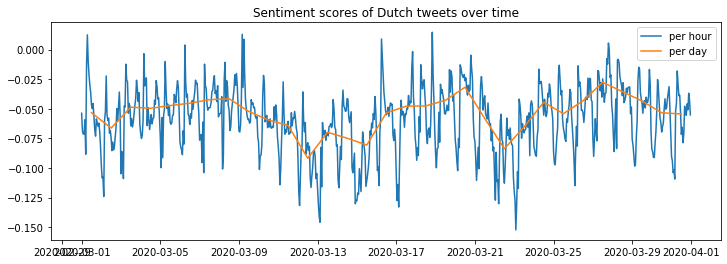

In [66]:
sentimentPerHour = getSentimentPerHour(DATADIRECTORYALL)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)
visualizeSentiment([{DATA:sentimentPerHour,LABEL:"per hour"},{DATA:sentimentPerDay,LABEL:"per day"}])

In [67]:
{k:round(v[SENTIMENT],3) for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

{'20200312-12': -0.092,
 '20200322-12': -0.084,
 '20200315-12': -0.081,
 '20200314-12': -0.075,
 '20200313-12': -0.07,
 '20200302-12': -0.066,
 '20200323-12': -0.065,
 '20200311-12': -0.064,
 '20200310-12': -0.06,
 '20200321-12': -0.058,
 '20200331-12': -0.054,
 '20200325-12': -0.054,
 '20200316-12': -0.053,
 '20200330-12': -0.053,
 '20200301-12': -0.053,
 '20200309-12': -0.052,
 '20200304-12': -0.05,
 '20200303-12': -0.049,
 '20200317-12': -0.048,
 '20200318-12': -0.048,
 '20200305-12': -0.047,
 '20200306-12': -0.045,
 '20200324-12': -0.044,
 '20200329-12': -0.043,
 '20200326-12': -0.043,
 '20200319-12': -0.043,
 '20200307-12': -0.042,
 '20200308-12': -0.042,
 '20200328-12': -0.036,
 '20200320-12': -0.032,
 '20200327-12': -0.028}

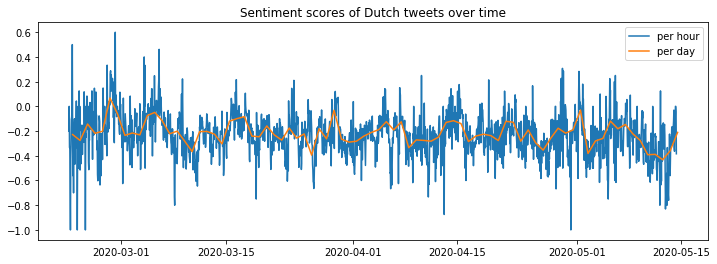

In [42]:
DATEFORMATHOURRIVM = "%Y%m%d-%H.rivm.gz"

sentimentPerHour = getSentimentPerHour(DATADIRECTORYRIVM)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)
visualizeSentiment([{DATA:sentimentPerHour,LABEL:"per hour"},{DATA:sentimentPerDay,LABEL:"per day"}])

In [43]:
{k:round(v[SENTIMENT],3) for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

{'20200512-12': -0.432,
 '20200326-12': -0.395,
 '20200510-12': -0.392,
 '20200511-12': -0.388,
 '20200502-12': -0.381,
 '20200310-12': -0.366,
 '20200513-12': -0.36,
 '20200426-12': -0.354,
 '20200408-12': -0.335,
 '20200314-12': -0.303,
 '20200425-12': -0.295,
 '20200331-12': -0.289,
 '20200416-12': -0.285,
 '20200401-12': -0.282,
 '20200423-12': -0.282,
 '20200411-12': -0.282,
 '20200309-12': -0.281,
 '20200503-12': -0.28,
 '20200420-12': -0.277,
 '20200509-12': -0.276,
 '20200224-12': -0.276,
 '20200410-12': -0.275,
 '20200322-12': -0.273,
 '20200409-12': -0.272,
 '20200330-12': -0.265,
 '20200328-12': -0.263,
 '20200504-12': -0.259,
 '20200427-12': -0.259,
 '20200324-12': -0.257,
 '20200412-12': -0.248,
 '20200319-12': -0.246,
 '20200402-12': -0.24,
 '20200318-12': -0.24,
 '20200417-12': -0.24,
 '20200419-12': -0.237,
 '20200301-12': -0.235,
 '20200321-12': -0.231,
 '20200303-12': -0.231,
 '20200223-12': -0.228,
 '20200418-12': -0.225,
 '20200313-12': -0.225,
 '20200325-12': -0.22

In [44]:
import pattern

In [59]:
from pattern.nl import sentiment
help(sentiment)

Help on Sentiment in module pattern.nl object:

class Sentiment(pattern.text.Sentiment)
 |  Sentiment(path='', language=None, synset=None, confidence=None, **kwargs)
 |  
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Method resolution order:
 |      Sentiment
 |      pattern.text.Sentiment
 |      pattern.text.lazydict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  load(self, path=None)
 |      Loads the XML-file (with sentiment annotations) from the given path.
 |      By default, Sentiment.path is lazily loaded.
 |  
 |  --------------------------------------------------------------

In [65]:
sentiment("Dit is een hele slechte!!!")

(-1.0, 1.0)